In [64]:
# Author Kate Lisovenko

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/refs/heads/main/assignment/weatherreadings1.csv")

In [65]:
# getting the list of the column's names
columns_list = data.columns.tolist()
print(columns_list)

['siteId', 'reportStartDateTime', 'reportEndDateTime', 'collectionName', 'isPublic', 'isLatestVersion', 'observationType', 'softwareType', 'windDirection', 'relativeHumidity', 'windSpeed_MilePerHour', 'windSpeed_MetrePerSecond', 'dryBulbTemperature_Fahrenheit', 'dryBulbTemperature_Celsius', 'wetBulbTemperature_Fahrenheit', 'wetBulbTemperature_Celsius', 'rainfallAmount_Inch', 'rainfallAmount_Millimetre', 'rainfallRate_InchPerHour', 'rainfallRate_MillimetrePerHour', 'airPressure_InchOfMercury', 'airPressure_Hectopascal', 'dewPointTemperature_Fahrenheit', 'dewPointTemperature_Celsius', 'isOfficial', 'isDcnn', 'longitude', 'latitude', 'height', 'id', 'localReportEndDateTime', 'externalSiteId', 'createdDateTime', 'version', 'externalId']


In [66]:
# I am going to creadte the plot of the temperature over time ( "dryBulbTemperature_Celsius" )

# checking out the data in the columns I need:

print(data['dryBulbTemperature_Celsius'].head(5)) # temperature

print(data['reportEndDateTime'].head(5)) # date and time


0    15.944444
1    15.777778
2    15.111111
3    14.277778
4    13.666667
Name: dryBulbTemperature_Celsius, dtype: float64
0    2024-10-02T16:15:00+00:00
1    2024-10-02T16:45:00+00:00
2    2024-10-02T17:00:00+00:00
3    2024-10-02T17:15:00+00:00
4    2024-10-02T17:30:00+00:00
Name: reportEndDateTime, dtype: object


The 'dryBulbTemperature_Celsius' contains the float type data. The data in 'reportEndDateTime' is in object format. I need to convert it to the datetime object.


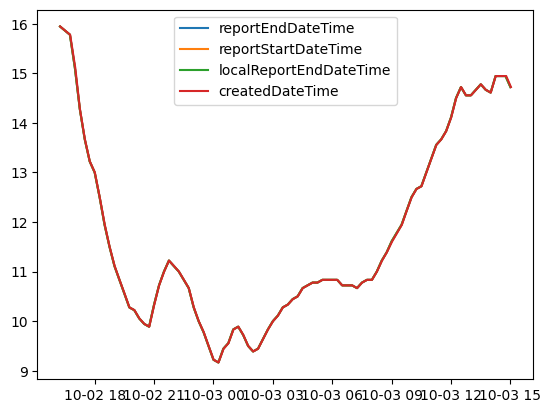

In [67]:
# converting the data with time and date to datetime format: 
data['reportEndDateTime'] = pd.to_datetime(data['reportEndDateTime'])
data['reportStartDateTime'] = pd.to_datetime(data['reportStartDateTime'])
data['localReportEndDateTime'] = pd.to_datetime(data['localReportEndDateTime'])
data['createdDateTime'] = pd.to_datetime(data['createdDateTime'])


# I am not sure if there is a sagnificant difference beetwen the dates, so I will have a look at it on the plot:

fig,ax =plt.subplots()

columns = ['reportEndDateTime','reportStartDateTime','localReportEndDateTime','createdDateTime'] # the list of the dates

for column in columns:
    ax.plot(data[column],data['dryBulbTemperature_Celsius'], label = column)
ax.legend()
plt.show()


The plots do not display obvious differences, so I will use 'localReportEndDateTime'.

In [68]:
# Checking the missing data:

data[['localReportEndDateTime','dryBulbTemperature_Celsius']].isnull().sum()

localReportEndDateTime        0
dryBulbTemperature_Celsius    0
dtype: int64

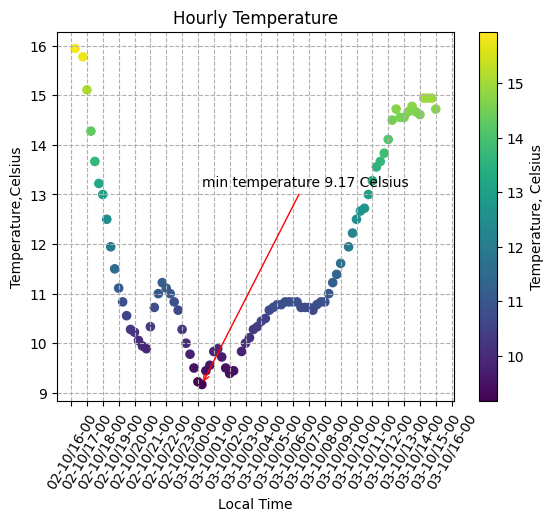

In [72]:
# Ref: https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
# Ref: https://www.w3schools.com/python/matplotlib_scatter.asp



fig,ax =plt.subplots()

scatterplot = ax.scatter(data['localReportEndDateTime'], 
           data['dryBulbTemperature_Celsius'],linewidth=0.9, 
           c=data['dryBulbTemperature_Celsius'], cmap='viridis')

# setting labels and grid
ax.set_ylabel('Temperature,Celsius')
ax.set_xlabel('Local Time')
ax.set_title('Hourly Temperature')
ax.grid(which='both', linestyle='--', linewidth=0.8) 

# choosing the ticks frequency
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))# ticks every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m/%H-%M')) # date and time format

plt.tick_params(axis='x', rotation=60, colors = 'black')


# finding the min temp and it's time 
min_temp = round((data['dryBulbTemperature_Celsius'].min()),2) # rounded min temp
# to find the time for min temp I need to find index for min.temp 
min_temp_index = data['dryBulbTemperature_Celsius'].idxmin() 
min_temp_time = data['localReportEndDateTime'][min_temp_index]


# doing an arrow on the plot
ax.annotate(f'min temperature {min_temp} Celsius', xy=(min_temp_time,min_temp),xytext=(min_temp_time,min_temp + 4),arrowprops={'arrowstyle': '->', 'color': 'red'})

cbar = plt.colorbar(scatterplot)
cbar.set_label('Temperature, Celsius')

plt.show()
